In [15]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pd.set_option("max_column",100)
pd.set_option("max_colwidth",1000)
pd.set_option("max_row",1000)

# Session 31 - Ensemble Methods
Notebook ini akan membahas bagaimana melakukan ensemble methods. kita akan menggunakan data klasifikasi diabetes seperti pada hands on sebelumnya yang melakukan prediksi apakah seseorang dapat mempunyai penyakit diabetes dari beberapa kondisi tubuh/fitur yang menyertainya.

In [16]:
# Load dataset
import pandas as pd
df = pd.read_csv("fraud.csv")

In [17]:
df.head()

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,44,0,2,0,0,2,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,"356 Elizabeth Inlet Suite 120\nPort Joshuabury, NM 37681",3,3,7,True,111,1,1,0,0,0,3,3,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,131,2,0,0,0,5,0,4,0,1,4,0,0,1,0,0,0,0,0,0,2,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM 51359",3,3,1,False,85,0,0,0,0,3,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside, TN 60556-0871",7,7,6,True,411,2,0,0,3,4,0,6,0,1,3,1,2,0,0,1,0,0,0,0,2,0,1,0


In [18]:
# Split train & test data
import pandas as pd
df = pd.read_csv("fraud.csv")

# Split Feature Vector and Label
X = df[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = df['Fraud_Decoded']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

## Standard Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

#train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

#predict
y_predicted = dt.predict(X_test)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num


classification report
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.50      0.67      0.57        15

    accuracy                           0.65        43
   macro avg       0.64      0.65      0.64        43
weighted avg       0.68      0.65      0.66        43



---
# Challenge #1
# Bagging: Random Forest

In [20]:
# Lengkapi script dibawah ini. inisialisasi object RandomForestClassifier dengan variabel rf
from sklearn.ensemble import RandomForestClassifier

#train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

#predict
y_predicted = rf.predict(X_test)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted))


classification report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.75      0.60      0.67        15

    accuracy                           0.79        43
   macro avg       0.78      0.75      0.76        43
weighted avg       0.79      0.79      0.78        43



In [21]:
#predict
y_predicted = rf.predict(X_test)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num


classification report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.75      0.60      0.67        15

    accuracy                           0.79        43
   macro avg       0.78      0.75      0.76        43
weighted avg       0.79      0.79      0.78        43



## Interpretation

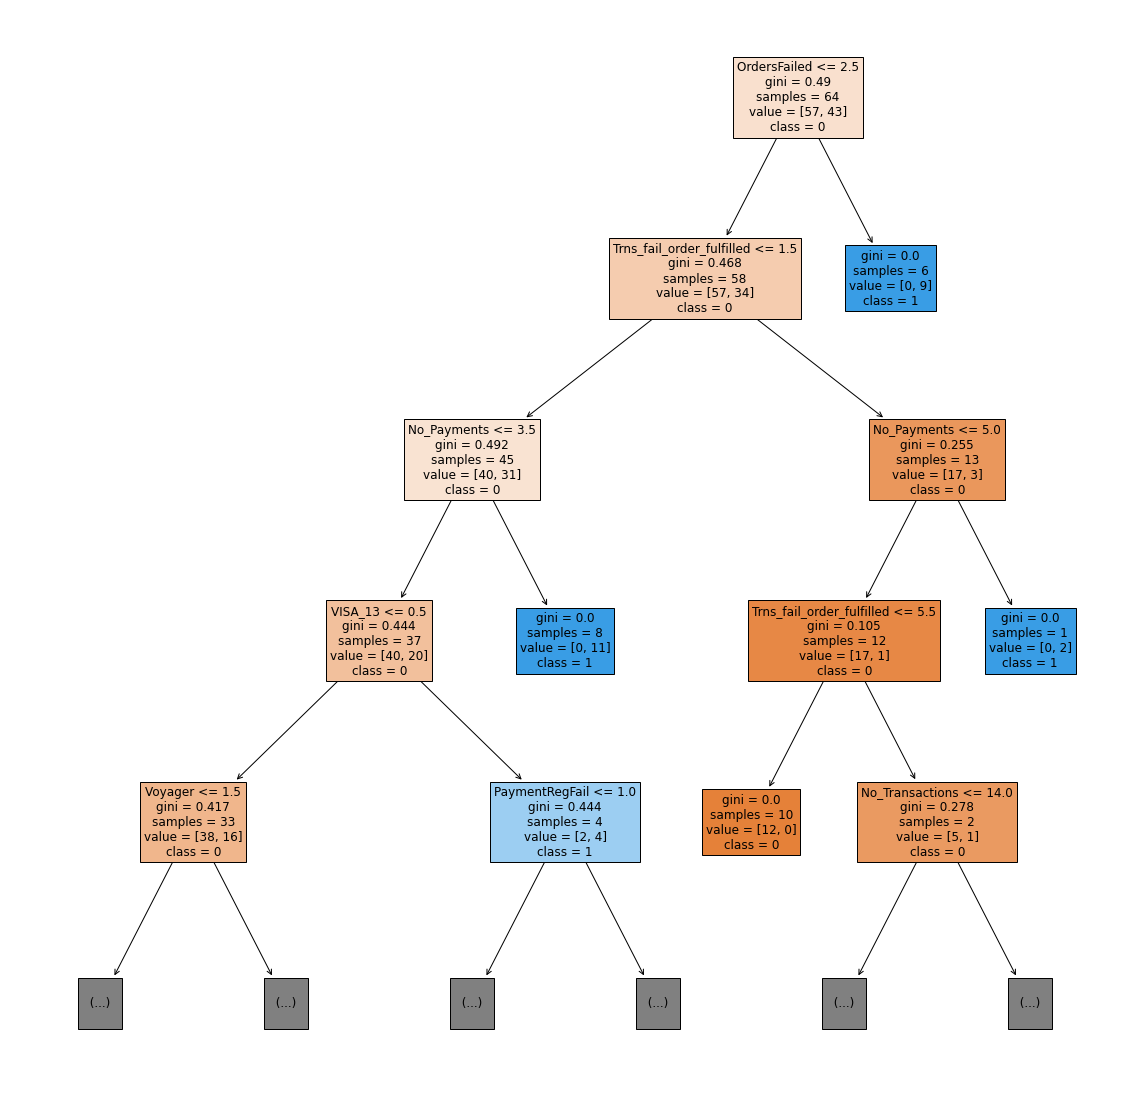

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(rf.estimators_[2],
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=4, fontsize=12)
plt.show()

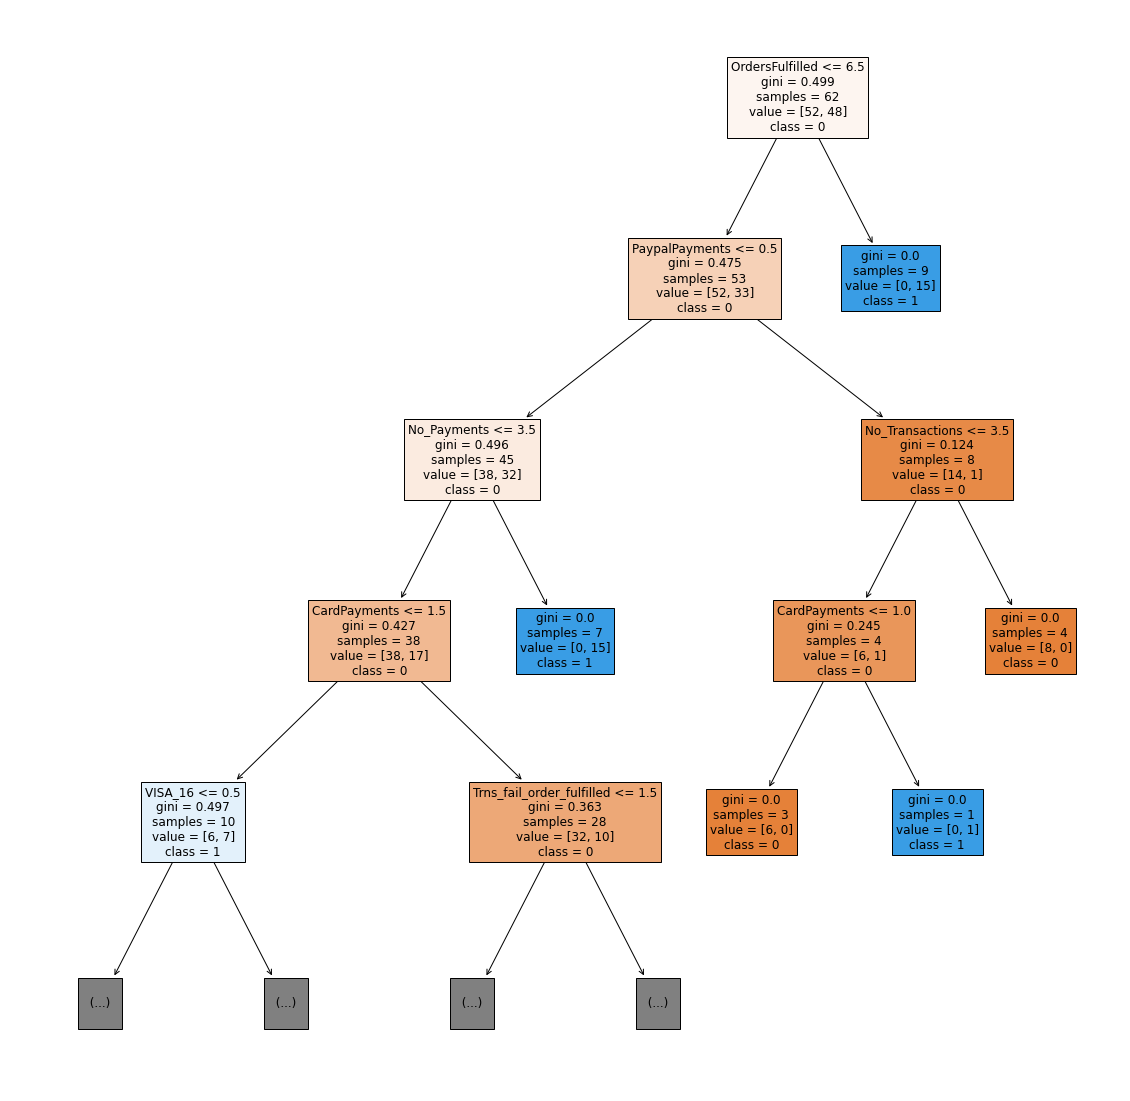

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(rf.estimators_[1],
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=4, fontsize=12)
plt.show()

Text(0.5, 1.0, 'feature importance score')

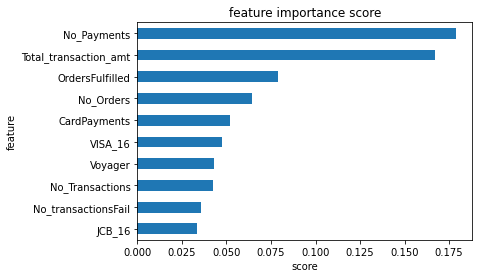

In [24]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## Hyperparameter tuning with RandomizedSearch

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

#List Hyperparameters yang akan diuji
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init random forest dengan randomsearch, cross validation = 5
rf = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(X, y)

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

#Prediksi menggunakan model baru
y_predicted = best_model.predict(X_test)#Check performa dari model
print(classification_report(y_test, y_predicted))
# roc_auc_score(y_test, y_pred)

Best n_estimators: 200
Best max_depth: 10
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.80      0.89        15

    accuracy                           0.93        43
   macro avg       0.95      0.90      0.92        43
weighted avg       0.94      0.93      0.93        43



---
# Challenge #2
# Boosting: AdaBoost

In [38]:
# Lengkapi script dibawah ini. inisialisasi object AdaBoostClassifier dengan variabel ab
from sklearn.ensemble import AdaBoostClassifier

#train
ab = AdaBoostClassifier(n_estimators=50,random_state=42)
ab.fit(X_train,y_train)
# clf.fit(X_train,y_train)

#predict
y_predicted = clf.predict(X_test)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted))


classification report
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.42      0.53      0.47        15

    accuracy                           0.58        43
   macro avg       0.56      0.57      0.56        43
weighted avg       0.61      0.58      0.59        43



In [36]:
#predict
y_predicted = ab.predict(X_test)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num


classification report
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.42      0.53      0.47        15

    accuracy                           0.58        43
   macro avg       0.56      0.57      0.56        43
weighted avg       0.61      0.58      0.59        43



## Hyperparameter Tuning Adaboost

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                   'n_estimators': [10, 50, 100, 500, 1000, 5000],
                   'learning_rate':np.arange(0.1, 2.1, 0.1)
                  }

# Init Logres dengan Gridsearch, cross validation = 5
ab = AdaBoostClassifier(random_state=42)
clf = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='accuracy')

#Fitting Model
best_model = clf.fit(X, y)

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

#Prediksi menggunakan model baru
y_predicted = best_model.predict(X_train)
y_predicted = best_model.predict(X_test)#Check performa dari model
print(classification_report(y_test, y_predicted))
# roc_auc_score(y_test, y_pred)

Best n_estimators: 50
Best learning_rate: 0.2
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.80      0.89        15

    accuracy                           0.93        43
   macro avg       0.95      0.90      0.92        43
weighted avg       0.94      0.93      0.93        43



Bad hyperparameter combination! we need to explore more!

# Stacking

## Choosing the baseline

In [ ]:
from sklearn.metrics import accuracy_score

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, params, cv=10, scoring_fit='accuracy',
                       scoring_test=accuracy_score, do_probabilities = False):
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=params, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = rs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    score = scoring_test(y_test_data, pred)
    
    return [best_model, pred, score]

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Defining our estimator, the algorithm to optimize
models_to_train = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestClassifier(), AdaBoostClassifier()]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2'],
        'C': np.logspace(-4,4,20)
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2]
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap
    },
    { # Adaboost
       'n_estimators': [10, 50, 100, 500, 1000, 5000],
       'learning_rate':np.arange(0.1, 2.1, 0.1)
    }
    
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(X_train, X_test, y_train, y_test, 
                                 model, params, cv=5)
    models_preds_scores.append(result)

In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

## Do the Stacking

In [ ]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=0.1, penalty='l2')))
level0.append(('knn', KNeighborsClassifier(k=3)))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = RandomForestClassifier(max_depth=5, n_estimator=10)

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X, y)

In [ ]:
#predict
y_predicted = model.predict(X_test)

#eval
from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num